In [1]:
from pydlr import dlr
import matplotlib.pyplot as plt
import numpy as np
from functions import *

To avoid multipoles issues we produce different DLR representations for every Green function. Number of Green functions in Self energy equal to 2*n-1 therefore for second order we need 3 DLR representations. To differentiate them from each other we can change either E_max or eps 

In [2]:
E_max, beta = 10., 20.
d1 = dlr(lamb=beta * (E_max + 1), eps=1e-12)
d2 = dlr(lamb=beta * (E_max - 2), eps=1e-12)
d3 = dlr(lamb=beta * (E_max + 3), eps=1e-12)

w_x1 = d1.dlrrf/beta  # real frequency grid
tau_l1 = d1.get_tau(beta)  # time tau grid
iw_q1 = d1.get_matsubara_frequencies(beta)  # matsubara frequency grid

w_x2 = d2.dlrrf/beta  # real frequency grid
tau_l2 = d2.get_tau(beta)  # time tau grid
iw_q2 = d2.get_matsubara_frequencies(beta)  # matsubara frequency grid

w_x3 = d3.dlrrf/beta  # real frequency grid
tau_l3 = d3.get_tau(beta)  # time tau grid
iw_q3 = d3.get_matsubara_frequencies(beta)  # matsubara frequency grid

In [3]:
print("Number of DLR poles: ", len(w_x1), len(w_x2), len(w_x3))

Number of DLR poles:  37 35 38


In [4]:
# Now we should create a function to give to the DLR
G_iw_q1 = get_G_iw(iw_q1, a=2) 
G_iw_q2 = get_G_iw(iw_q2, a=2) 
G_iw_q3 = get_G_iw(iw_q3, a=2)

A_x1 = d1.dlr_from_matsubara(G_iw_q1, beta) 
A_x2 = d2.dlr_from_matsubara(G_iw_q2, beta)
A_x3 = d3.dlr_from_matsubara(G_iw_q3, beta)

Second order self energy using DLR poles
$$
\Sigma(i\omega) = \sum_{k1, k2, k3} A_{k_1} A_{k_2} A_{k_3}\frac{[f(\omega_{k_1}) - f(\omega_{k_2})] [n(\omega_{k_{2}} - \omega_{k_1}) + f(-\omega_{k_3}) ]}{i\omega + \omega_{k_1} - \omega_{k_2} - \omega_{k_3}}
$$

In [5]:
ac_list = [myac(-A, w) for A, w in zip([A_x1, A_x2, A_x3], [w_x1, w_x2, w_x3])]
print(ac_list[0].pole_location)

[-1.09941120e+01 -1.03175595e+01 -9.46629390e+00 -8.42985861e+00
 -7.36604147e+00 -6.43679901e+00 -5.78359996e+00 -4.56697926e+00
 -3.68302074e+00 -2.82297107e+00 -2.19662460e+00 -1.60919975e+00
 -1.22222727e+00 -9.64187702e-01 -5.91643369e-01 -4.60377592e-01
 -3.29266920e-01 -1.47910842e-01 -1.06631333e-02  1.15094398e-01
  2.74578075e-01  4.82093851e-01  6.44847467e-01  8.40272732e-01
  1.28969493e+00  1.60919975e+00  2.10746465e+00  2.71351446e+00
  3.51685305e+00  4.03507070e+00  4.88890907e+00  5.64594214e+00
  6.72218186e+00  7.71350161e+00  9.13395853e+00  1.03175595e+01
  1.09941120e+01]


In [6]:
iw = matsubara("F", n=np.arange(-20, 20), beta=beta)
w = np.linspace(-5, 5, 100)
SE = SelfEnergy(beta=beta)
SE_DLR_iw = SE.get_self_energy_from_poles(ac_list, iw*1j)
SE_DLR_rf = SE.get_self_energy_from_poles(ac_list, w+0.1*1j)

In [7]:
SE_spec_rf = SE.SE_full_spectral(2000000, 2, w+0.1*1j) # small imaginary Gamma part 0.1
SE_spec_iw = SE.SE_full_spectral(2000000, 2, iw*1j)

In [8]:
print(np.abs(np.imag(SE_DLR_iw) - np.imag(SE_spec_iw)))

[3.29465297e-05 3.38790964e-05 3.48149705e-05 3.57399124e-05
 3.66339271e-05 3.74691516e-05 3.82069131e-05 3.87935886e-05
 3.91547173e-05 3.91865718e-05 3.87441623e-05 3.76248219e-05
 3.55485847e-05 3.21452809e-05 2.69871189e-05 1.97849237e-05
 1.10253088e-05 3.35072088e-06 2.34676821e-06 1.21575361e-05
 1.21575361e-05 2.34676821e-06 3.35072087e-06 1.10253088e-05
 1.97849237e-05 2.69871189e-05 3.21452809e-05 3.55485847e-05
 3.76248219e-05 3.87441623e-05 3.91865719e-05 3.91547174e-05
 3.87935888e-05 3.82069134e-05 3.74691519e-05 3.66339273e-05
 3.57399125e-05 3.48149705e-05 3.38790962e-05 3.29465295e-05]


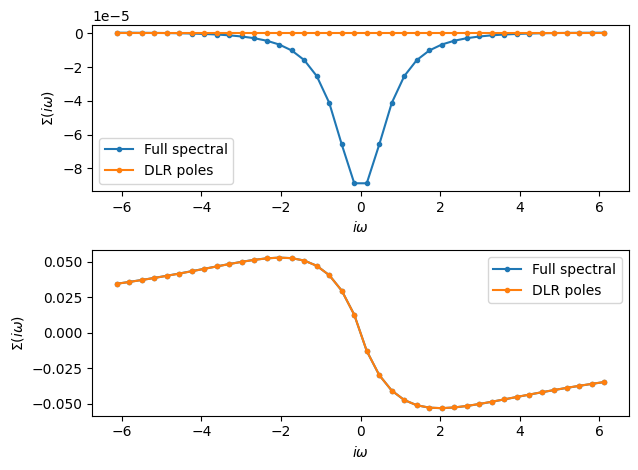

In [9]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(iw, np.real(SE_spec_iw), marker=".", label="Full spectral")
plt.plot(iw, np.real(SE_DLR_iw), marker=".", label="DLR poles")
plt.ylabel(r"$\Sigma(i\omega)$")
plt.xlabel(r"$i\omega$")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(iw, np.imag(SE_spec_iw), marker=".", label="Full spectral")
plt.plot(iw, np.imag(SE_DLR_iw), marker=".", label="DLR poles")
plt.ylabel(r"$\Sigma(i\omega)$")
plt.xlabel(r"$i\omega$")
plt.legend()
plt.tight_layout()
plt.show()

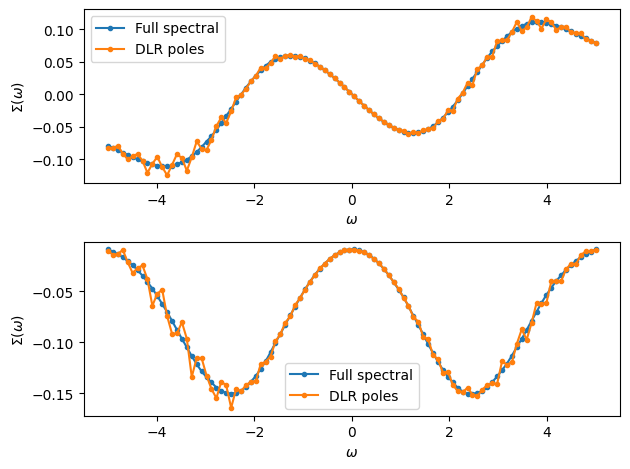

In [10]:
# plot SE rf
plt.subplot(2, 1, 1)
plt.ylabel(r"$\Sigma(\omega)$")
plt.xlabel(r"$\omega$")
plt.plot(w, np.real(SE_spec_rf), marker=".", label="Full spectral")
plt.plot(w, np.real(SE_DLR_rf), marker=".", label="DLR poles")
plt.legend()
plt.subplot(2, 1, 2)
plt.ylabel(r"$\Sigma(\omega)$")
plt.xlabel(r"$\omega$")
plt.plot(w, np.imag(SE_spec_rf), marker=".", label="Full spectral")
plt.plot(w, np.imag(SE_DLR_rf), marker=".", label="DLR poles")
plt.legend()
plt.tight_layout()
plt.show()